In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('adult income1.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31947 entries, 0 to 31946
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31947 non-null  int64 
 1   workclass       31947 non-null  object
 2   fnlwgt          31947 non-null  int64 
 3   education       31947 non-null  object
 4   education.num   31947 non-null  int64 
 5   marital.status  31947 non-null  object
 6   occupation      31947 non-null  object
 7   relationship    31947 non-null  object
 8   race            31947 non-null  object
 9   sex             31947 non-null  object
 10  native.country  31947 non-null  object
 11  income          31947 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.9+ MB


In [6]:
df.drop('fnlwgt' , axis = 1, inplace = True)

In [10]:
df['age'].describe()

count    31947.000000
mean        38.570695
std         13.646280
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [11]:
df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
?                    1778
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [12]:
df['education'].value_counts()

HS-grad         10352
Some-college     7180
Bachelors        5208
Masters          1674
Assoc-voc        1365
11th             1164
Assoc-acdm       1054
10th              922
7th-8th           629
Prof-school       559
9th               505
12th              416
Doctorate         388
5th-6th           318
1st-4th           163
Preschool          50
Name: education, dtype: int64

In [14]:
df['marital.status'].value_counts()

Married-civ-spouse       14675
Never-married            10475
Divorced                  4397
Separated                 1004
Widowed                    975
Married-spouse-absent      398
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [17]:
df['occupation'].value_counts()

Craft-repair         3838
Prof-specialty       3732
Exec-managerial      3696
Adm-clerical         3595
Sales                3388
Other-service        3148
Machine-op-inspct    1902
?                    1785
Transport-moving     1500
occupation           1462
Handlers-cleaners    1317
Farming-fishing       957
Tech-support          861
Protective-serv       617
Priv-house-serv       141
Armed-Forces            8
Name: occupation, dtype: int64

## Data Cleaning

In [34]:
df.loc[df['workclass'] == '?', 'workclass'] = 'unemployed'

In [37]:
df.loc[df['occupation'] == '?', 'occupation'] = 'none'

# Visualizing the data

## Bar plot

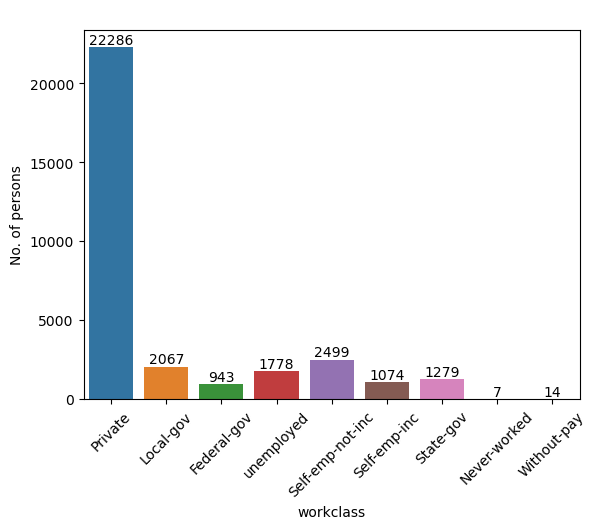

In [43]:
g = sns.countplot(data = df, x = 'workclass')
g.set_xticklabels(g.get_xticklabels() , rotation = 45)
plt.ylabel('No. of persons')
plt.title('')

for fig in g.containers:
    g.bar_label(fig, label_type = 'edge' , padding = 0)

#### Conclusions


About 75% of people work in private sector

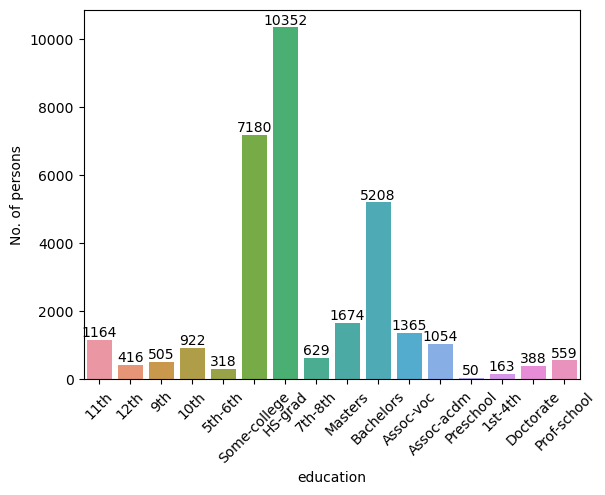

In [57]:
g = sns.countplot(data = df, x = 'education')
g.set_xticklabels(g.get_xticklabels() , rotation = 45)
plt.ylabel('No. of persons')
plt.title('')

for fig in g.containers:
    g.bar_label(fig, label_type = 'edge' , padding = 0)

Majority of people are only High-School graduate.

## Lets check the relationship between marital status and education 

Text(0.5, 1.0, 'relationship between marital status and education')

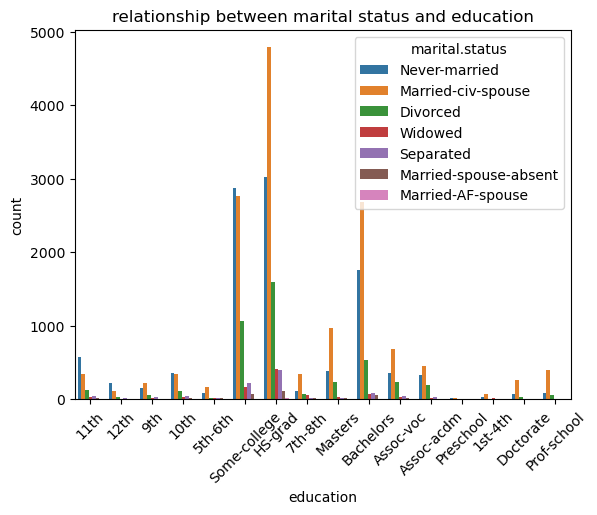

In [50]:
g = sns.countplot(data = df, x = 'education', hue = 'marital.status')
g.set_xticklabels(g.get_xticklabels() , rotation = 45)
plt.title('relationship between marital status and education')

#### Conclusions

It is seen that there are more numbers of

## Let's check the relationship between race and education

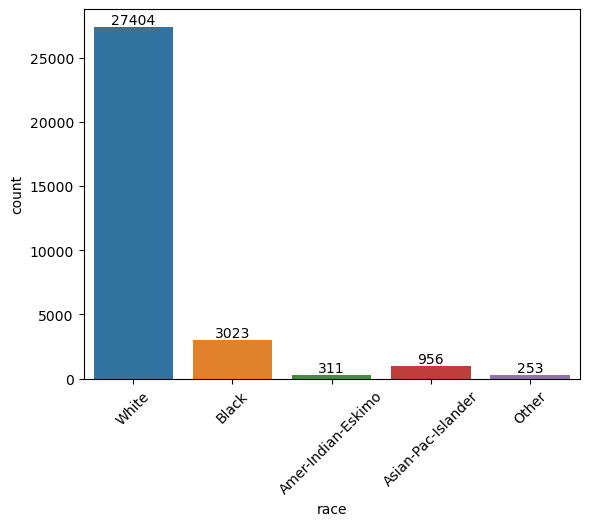

In [53]:
g = sns.countplot(data = df, x = 'race')
g.set_xticklabels(g.get_xticklabels() , rotation = 45)
plt.title('')
for fig in g.containers:
    g.bar_label(fig, label_type = 'edge' , padding = 0)

Current society is still white dominent. About 88.5% percent of people are white. 

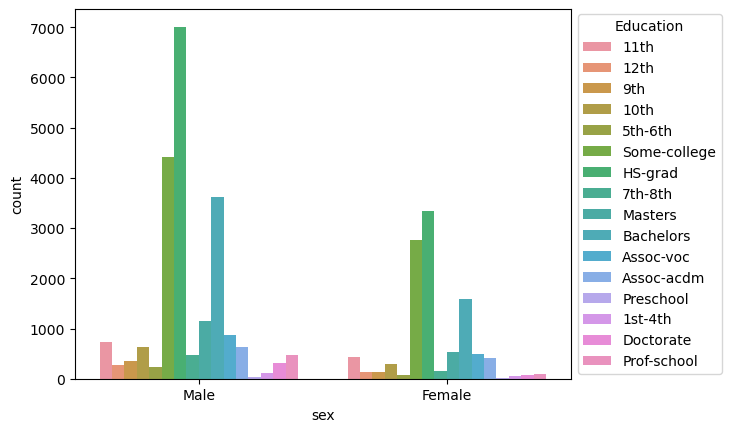

In [64]:
g = sns.countplot(data = df, x = 'sex' , hue = 'education')

plt.title('')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Education')

## Now, let's build the relationship between these features with income

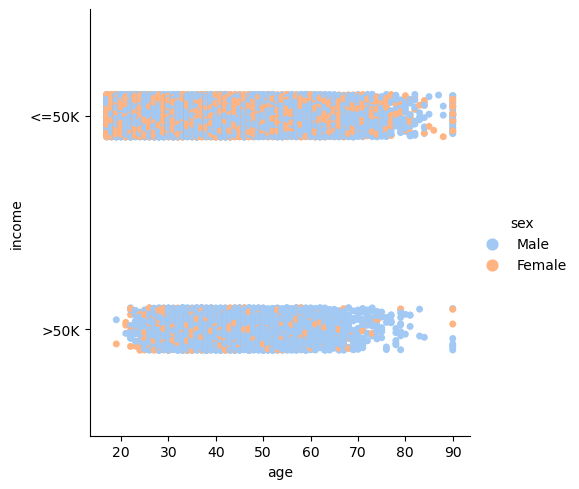

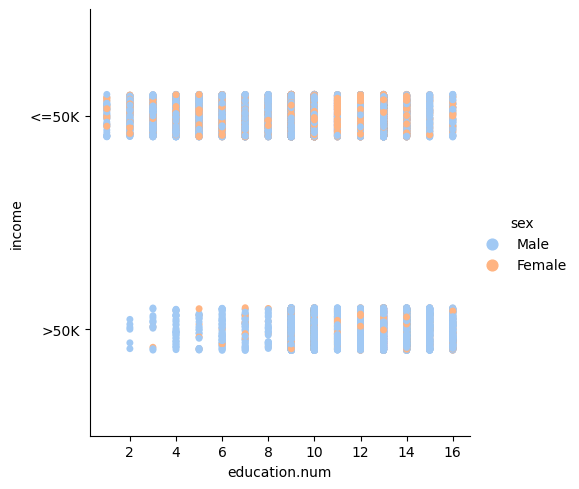

In [65]:
sns.catplot(data=df, y='income', x='age', hue='sex', palette='pastel')
sns.catplot(data=df, y='income', x='education.num', hue='sex', palette='pastel')

This chart shows that female with higher education also tends to earn less. People with income greater than 50k are male in majority. 

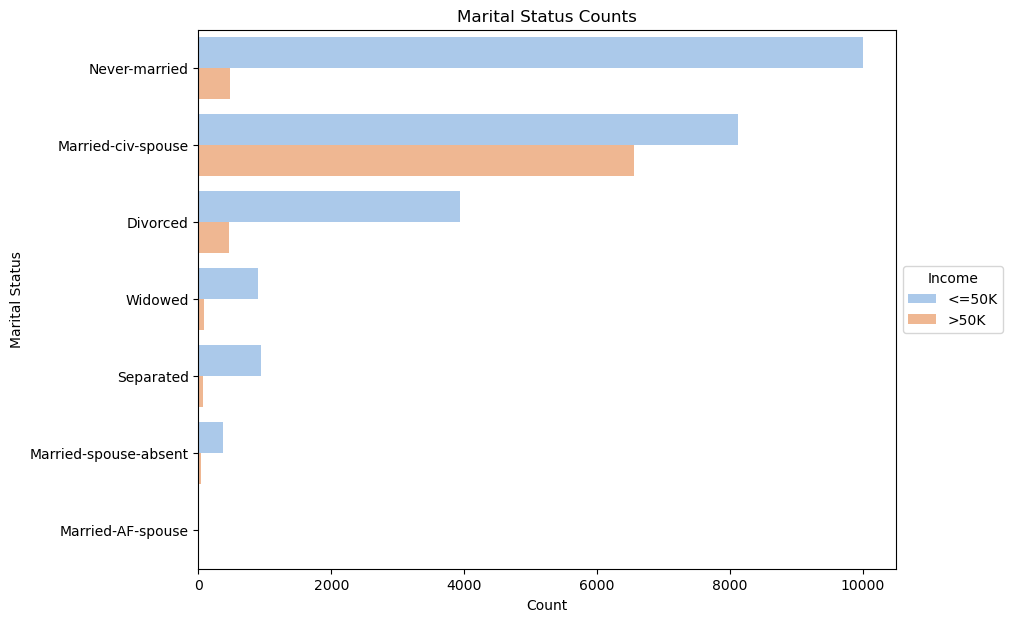

In [68]:
plt.figure(figsize=(9,7))

sns.countplot(data=df, y='marital.status', hue='income', palette='pastel')

plt.ylabel('Marital Status')
plt.xlabel('Count')
plt.title('Marital Status Counts')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Income')

plt.show()

Text(0.5, 1.0, 'Work Class Counts')

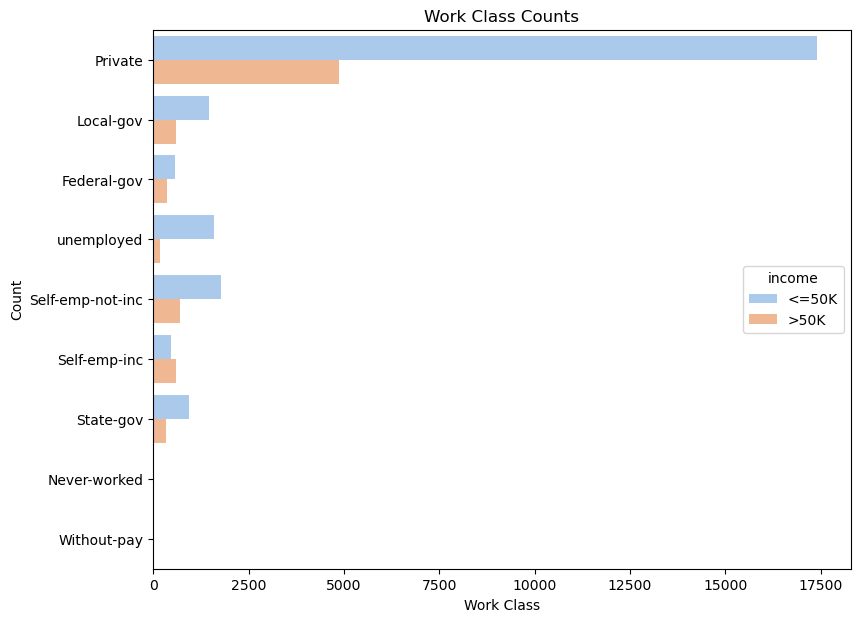

In [69]:
plt.figure(figsize=(9,7))

sns.countplot(data=df, y='workclass', hue='income', palette='pastel')

plt.xlabel('Work Class')
plt.ylabel('Count')
plt.title('Work Class Counts')


This shows that in only self employment more people are earning more than 50k

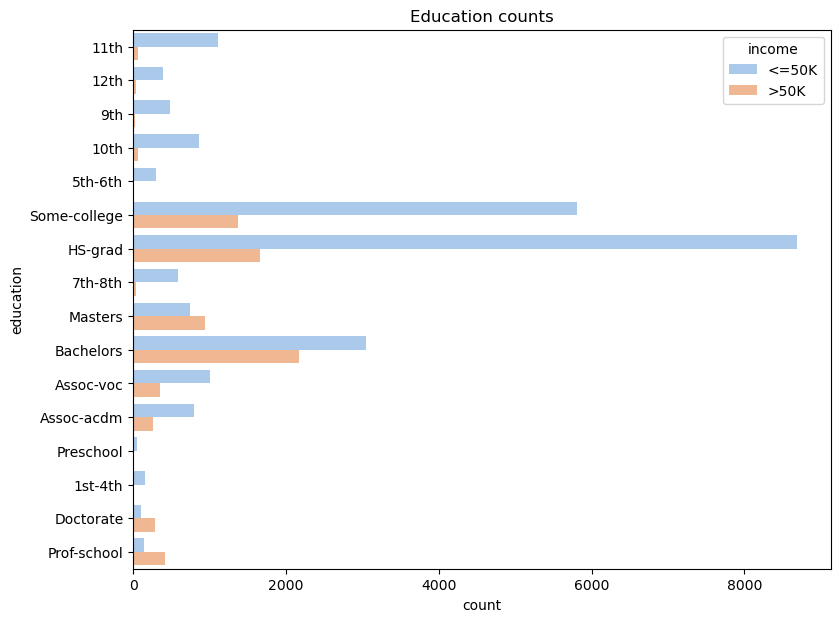

In [70]:
plt.figure(figsize=(9,7))
sns.countplot(data=df, y='education', hue='income', palette='pastel')
plt.title('Education counts')
plt.show()

This shows that people with master's degree, Doctorate, and Prof-school are more likly to earn more than 50k

# Lastly, lets plot histograms

Text(0.5, 1.0, 'Age Distribution')

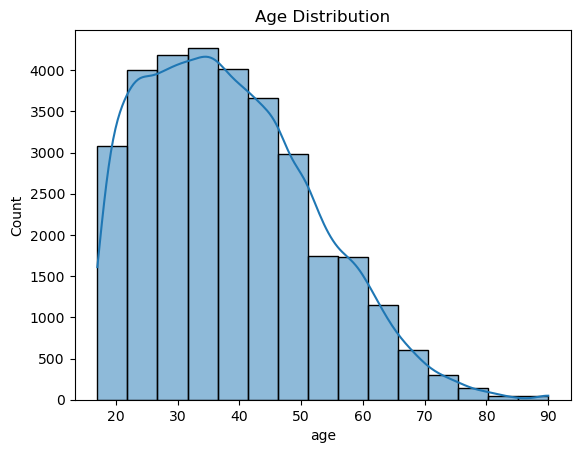

In [82]:
sns.histplot(data = df, x = 'age', bins = 15, kde = True)
plt.title("Age Distribution")


Text(0.5, 1.0, 'Correlation between numerical data')

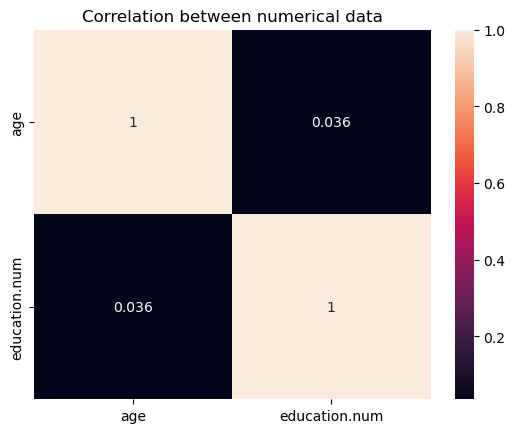

In [83]:
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation between numerical data')

This shows that there is no linear relation between numerical data of dataset